In [1]:
import seaborn as sns
import pandas as pd
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')
mpl.rc('font', family='Hancom Gothic')
mpl.rc('axes', unicode_minus=False)

from IPython.display import Image

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
X_train = pd.read_csv("./data_set/X_train14.csv").drop(columns='Unnamed: 0').drop(columns='aud_nationwide')
y_train = pd.read_csv("./data_set/y_train14.csv").drop(columns='Unnamed: 0')
X_test = pd.read_csv("./data_set/X_test14.csv").drop(columns='Unnamed: 0').drop(columns='aud_nationwide')
y_test = pd.read_csv("./data_set/y_test14.csv").drop(columns='Unnamed: 0')


df = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_final_14 = pd.concat([df, df_test], axis=0)

In [4]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_count', 'director_movie_count',
       'actor_movie_count', 'log_aud', 'before_news', 'after_news', 'holiday',
       'dist_cat', 'aud_nationwide', 'log_aud'],
      dtype='object')

In [5]:
df_final_14_origin = df_final_14.drop(columns=['log_aud'])

In [6]:
df_final_14_origin.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_count', 'director_movie_count',
       'actor_movie_count', 'before_news', 'after_news', 'holiday', 'dist_cat',
       'aud_nationwide'],
      dtype='object')

In [7]:
df_final_14_origin = df_final_14_origin[['title', 'release_date', 'director', 'starring_actors', 'screen', 'distributor', 'nation',
                    'genre', 'rate', 'running_times', 'expert_rating', 'audience_rating', 'aud_nationwide' ]]

In [8]:
df_final_14_origin.describe()

release_date       screen  running_times  expert_rating  \
count  9.250000e+02   925.000000     925.000000     925.000000   
mean   2.017023e+07   615.031351     109.778378       5.400735   
std    1.435678e+04   419.167442      19.932613       2.048343   
min    2.014111e+07    28.000000      48.000000       0.000000   
25%    2.016030e+07   322.000000      97.000000       5.000000   
50%    2.017061e+07   512.000000     110.000000       5.920000   
75%    2.018092e+07   827.000000     122.000000       6.700000   
max    2.019123e+07  2835.000000     222.000000       9.110000   

       audience_rating  aud_nationwide  
count       925.000000    9.250000e+02  
mean          8.166960    1.099422e+06  
std           1.492485    2.009962e+06  
min           0.000000    3.186600e+04  
25%           7.867150    9.701700e+04  
50%           8.457944    2.860420e+05  
75%           8.919948    1.124815e+06  
max          10.000000    1.626336e+07

In [9]:
np.max(df_final_14_origin['screen']), np.min(df_final_14_origin['screen'])

(2835, 28)

In [10]:
df_final_14_origin[df_final_14_origin['screen'] == 2835]

title  release_date     director               starring_actors  \
454  어벤져스: 엔드게임      20190424  안소니 루소,조 루소  로버트 다우니 주니어,크리스 에반스,크리스 헴스워스   

     screen         distributor nation genre      rate  running_times  \
454    2835  월트디즈니컴퍼니코리아 유한책임회사     미국    액션  12세이상관람가            181   

     expert_rating  audience_rating  aud_nationwide  
454           7.62         9.524421        13918759

In [11]:
df_final_14_origin[df_final_14_origin['screen'] == 28]

title  release_date  director starring_actors  screen  distributor nation  \
35  타샤 튜더      20180913  마츠타니 미츠에           타샤 튜더      28  (주)마노엔터테인먼트     일본   

    genre   rate  running_times  expert_rating  audience_rating  \
35  다큐멘터리  전체관람가            104            6.0         9.452381   

    aud_nationwide  
35           45764

In [12]:
np.max(df_final_14_origin['running_times']), np.min(df_final_14_origin['running_times'])

(222, 48)

In [13]:
df_final_14_origin[df_final_14_origin['running_times'] == 222]

title  release_date    director      starring_actors  screen  \
22    벤허      20160914  티무르 베크맘베토브  찰톤 헤스톤,잭 호킨스,하야 하라릿     717   

      distributor nation genre      rate  running_times  expert_rating  \
22  롯데쇼핑㈜롯데엔터테인먼트     미국  어드벤처  12세이상관람가            222           8.75   

    audience_rating  aud_nationwide  
22              9.0         1399771

In [14]:
df_final_14_origin[df_final_14_origin['running_times'] == 48]

title  release_date director starring_actors  screen  \
171  극장판 꼬마버스 타요의 에이스 구출작전      20160121      류정우     문남숙,정혜옥,최하나     200   

    distributor nation  genre   rate  running_times  expert_rating  \
171    (주)아이코닉스     한국  애니메이션  전체관람가             48            0.0   

     audience_rating  aud_nationwide  
171         9.111111          133736

In [15]:
df_final_14_origin[df_final_14_origin['running_times'] <= 65.000000]

title  release_date  director  \
112   극장판 숲의 요정 페어리루 ~크리스마스의 기적: 마법의 날개~      20171214    고로 사쿠라   
225   극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드      20161103  나카자와 쇼지로   
263                바다 탐험대 옥토넛 시즌4: 더 파이널      20170601    다라 오코넬   
316   극장판 파워레인저 트레인포스 VS 다이노포스 THE MOVIE      20151126  와타나베 카츠야   
494                  리틀 프린세스 소피아 : 신비한 섬      20170928    제이미 미첼   
603               바다 탐험대 옥토넛 시즌4: 늪지탐험선K      20160928    다라 오코넬   
676               바다 탐험대 옥토넛 시즌4: 빙하탐험선S      20160225    다라 오코넬   
677                          아이엠스타 뮤직어워드      20160914    와타다 신야   
680                   뽀로로 극장판 컴퓨터 왕국 대모험      20151210       박영균   
12   극장판 파워레인저: 애니멀포스 VS 닌자포스 미래에서 온 메시지      20171109  타케모토 노보루   
26               최강전사 미니특공대 : 새로운 악당의 습격      20150205       이영준   
58                              킹 오브 프리즘      20160811  히시다 마사카즈   
171                극장판 꼬마버스 타요의 에이스 구출작전      20160121       류정우   

               starring_actors  screen            distributor nation  genre  \
112                조경이,이재현,이지현     207  (주)이수C&E,(주)에이원엔터테인먼트     일본  애니메이션   
225  니시카와 슌스케,마츠모토 가쿠,나카무라 카이토     406    (주)넥스트엔터테인먼트월드(NEW)     일본     액션   
263                하성용,정재헌,엄상현     167             와이드 릴리즈(주)     영국  애니메이션   
316                심규혁,이인석,강시현     344     (주)스마일이엔티,(주)영화사오원     일본     액션   
494                    김미랑,서지연     135     월트디즈니컴퍼니코리아 유한책임회사     미국  애니메이션   
603                하성용,정재헌,엄상현     164             와이드 릴리즈(주)     영국  애니메이션   
676   하성용,정재헌,엄상현(페이소,트래커 목소리)     155             와이드 릴리즈(주)     영국  애니메이션   
677                정유정,김새해,김영은     358              씨제이이앤엠(주)     일본  애니메이션   
680                 이선,이미자,함수정     544    (주)넥스트엔터테인먼트월드(NEW)     한국  애니메이션   
12       나카오 마사키,야나기 미키,난바 쇼헤이     370    (주)넥스트엔터테인먼트월드(NEW)     일본     액션   
26                 엄상현,전태열,신용우     318              에이원엔터테인먼트     한국  애니메이션   
58   카키하라 테츠야,마에노 토모아키,마스다 토시키      53            (주)박수엔터테인먼트     일본  애니메이션   
171                문남숙,정혜옥,최하나     200               (주)아이코닉스     한국  애니메이션   

         rate  running_times  expert_rating  audience_rating  aud_nationwide  
112     전체관람가             65           0.00         0.000000           54988  
225     전체관람가             60           0.00         8.420000           63800  
263     전체관람가             57           0.00         8.269841           72926  
316     전체관람가             60           0.00         8.461538          100026  
494     전체관람가             64           0.00         8.550000           62454  
603     전체관람가             57           0.00         8.575269           69881  
676     전체관람가             58           0.00         7.775862           60977  
677     전체관람가             56           4.67         7.730263           67027  
680     전체관람가             62           0.00         8.899767          391760  
12      전체관람가             58           0.00         8.866667           65895  
26      전체관람가             60           0.00         7.558252          154342  
58   12세이상관람가             60           0.00         9.692308          103852  
171     전체관람가             48           0.00         9.111111          133736

In [16]:
np.max(df_final_14_origin['expert_rating']), np.min(df_final_14_origin['expert_rating'])

(9.11, 0.0)

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final_14_origin['expert_rating'], name = 'expert_rating'))
fig.add_trace(go.Box(y=df_final_14_origin['audience_rating'], name = 'audience_rating'))


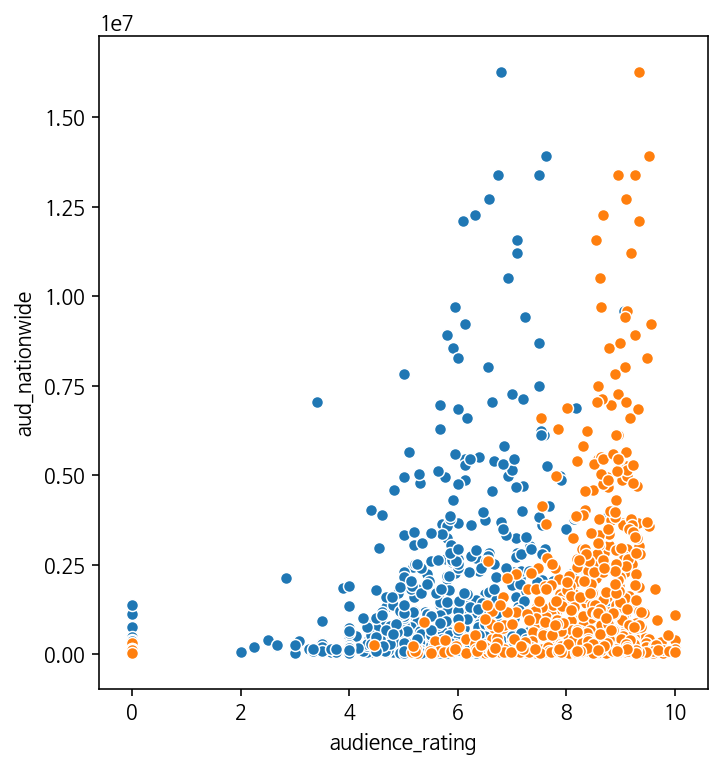

In [18]:

plt.figure(figsize=(12, 6))
plt.subplot(121)
#sns.scatterplot(x="expert_rating", y="audience_rating", hue = 'aud_nationwide', data=df_final_14_origin )
sns.scatterplot(x="expert_rating", y="aud_nationwide", data = df_final_14_origin)
plt.subplot(121)
sns.scatterplot(x="audience_rating", y="aud_nationwide",  data=df_final_14_origin)
plt.show()

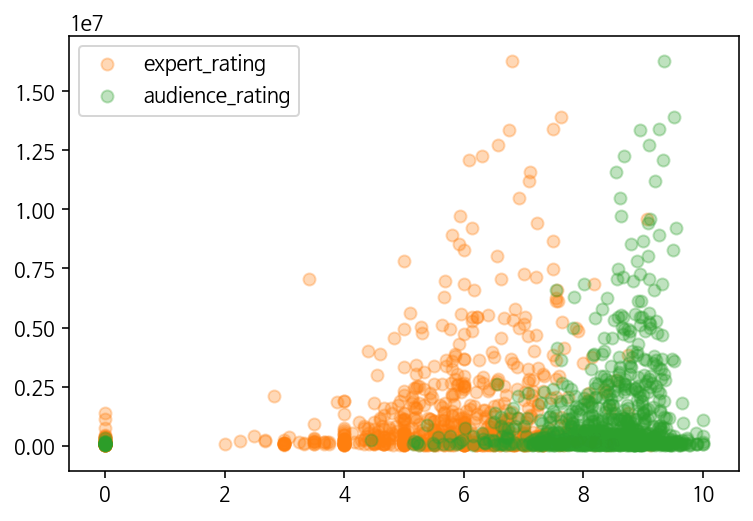

In [19]:
fig, ax = plt.subplots()
ax.scatter(x=df_final_14_origin['expert_rating'], y=df_final_14_origin['aud_nationwide'], c='tab:orange',
          alpha=0.3, label='expert_rating')
ax.scatter(x=df_final_14_origin['audience_rating'], y=df_final_14_origin['aud_nationwide'], c='tab:green',
          alpha=0.3, label='audience_rating')
ax.legend()
plt.show()

In [20]:
df_final_14_origin[df_final_14_origin['expert_rating'] >= 9]

title  release_date  director      starring_actors  screen distributor  \
146    기생충      20190530       봉준호          송강호,이선균,조여정    1948   씨제이이앤엠(주)   
624  아이리시맨      20191120  마틴 스코세이지  로버트 드 니로,알 파치노,조 페시      68     판씨네마(주)   

    nation genre      rate  running_times  expert_rating  audience_rating  \
146     한국   드라마  15세이상관람가            131           9.06         9.116783   
624     미국    범죄   청소년관람불가            209           9.11         8.870588   

     aud_nationwide  
146         9577981  
624           34723

In [21]:
df_final_14_origin_ex = df_final_14_origin[df_final_14_origin['expert_rating'] == 0.0]
df_final_14_origin_ex[df_final_14_origin_ex["genre"] != "애니메이션"]

title  release_date      director  \
68                               아내를 죽였다      20191211           김하라   
120                              번개맨의 비밀      20181206           강유선   
225   극장판 파워레인저: 닌자포스 VS 트레인포스 닌자 인 원더랜드      20161103      나카자와 쇼지로   
262                                  프리덤      20151119        피터 쿠센스   
266                         내부자들: 디 오리지널      20151231           우민호   
288                                제 5침공      20160225       J 블레이크슨   
298                                 교회오빠      20190516           이호경   
311                               라이트 아웃      20160824  데이비드 F. 샌드버그   
316   극장판 파워레인저 트레인포스 VS 다이노포스 THE MOVIE      20151126      와타나베 카츠야   
347                                  포커스      20150226   글렌 피카라,존 레쿼   
364                              해피 데스데이      20171108      크리스토퍼 랜던   
365                            주온: 더 파이널      20151001     오치아이 마사유키   
368                                  데자뷰      20180530           고경민   
461                             뷰티풀 투모로우      20171026           장재혁   
516                       브링 더 소울 : 더 무비      20190807           박준수   
524                           트리플 엑스 리턴즈      20170208      D.J. 카루소   
566                             쓰리 썸머 나잇      20150715           김상진   
12   극장판 파워레인저: 애니멀포스 VS 닌자포스 미래에서 온 메시지      20171109      타케모토 노보루   
41                                  일사각오      20160317       권혁만,고문안   
180                                  맥베스      20151203        저스틴 커젤   

                  starring_actors  screen          distributor nation  genre  \
68                    이시언,안내상,왕지혜     556            케이티하이텔(주)     한국    스릴러   
120                   서홍석,김혜원,유수호     309             (주)디스테이션     한국   어드벤처   
225     니시카와 슌스케,마츠모토 가쿠,나카무라 카이토     406  (주)넥스트엔터테인먼트월드(NEW)     일본     액션   
262    쿠바 구딩 쥬니어,베르나르드 포처,윌리암 새들러     117          주식회사 마운틴픽쳐스     미국    드라마   
266                   이병헌,조승우,백윤식     838               (주)쇼박스     한국     범죄   
288           클로이 모레츠,닉 로빈슨,알렉스 로     312  유니버설픽쳐스인터내셔널 코리아(유)     미국     액션   
298                   이관희,오은주,이소연     200            커넥트픽쳐스(주)     한국  다큐멘터리   
311  테레사 팔머,앨리시아 벨라 베일리,가브리엘 베이트먼     659        워너브러더스 코리아(주)     미국     공포   
316                   심규혁,이인석,강시현     344   (주)스마일이엔티,(주)영화사오원     일본     액션   
347          윌 스미스,마고 로비,로드리고 산토로     349        워너브러더스 코리아(주)     미국    코미디   
364             제시카 로테,이스라엘 브로우사드     714  유니버설픽쳐스인터내셔널 코리아(유)     미국     공포   
365                타이라 아이리,키리야마 렌     318  유니버설픽쳐스인터내셔널 코리아(유)     일본     공포   
368                   이천희,남규리,이규한     536        씨네그루(주)키다리이엔티     한국   미스터리   
461                       박효신,정재일      47  씨제이 씨지브이(CJ CGV)(주)     한국    드라마   
516                       RM,진,슈가     569   월트디즈니컴퍼니코리아 유한책임회사     한국  다큐멘터리   
524          빈 디젤,사무엘 L. 잭슨,루비 로즈     590        롯데쇼핑㈜롯데엔터테인먼트     미국     액션   
566                   김동욱,임원희,손호준     297   (주)리틀빅픽쳐스,(주)인벤트스톤     한국    코미디   
12          나카오 마사키,야나기 미키,난바 쇼헤이     370  (주)넥스트엔터테인먼트월드(NEW)     일본     액션   
41                     이지형,설지윤,최원      51              파이오니아21     한국    드라마   
180             마이클 패스벤더,마리옹 꼬띠아르     141              판씨네마(주)     영국    드라마   

         rate  running_times  expert_rating  audience_rating  aud_nationwide  
68   15세이상관람가             97            0.0         8.666667           91782  
120     전체관람가             69            0.0         8.721154           49574  
225     전체관람가             60            0.0         8.420000           63800  
262  12세이상관람가             95            0.0         8.545455          106030  
266   청소년관람불가            180            0.0         9.052407          160148  
288  12세이상관람가            112            0.0         6.350575          135874  
298     전체관람가             85            0.0         9.894737           92043  
311  15세이상관람가             81            0.0         7.713203         1111158  
316     전체관람가             60            0.0         8.461538          100026  
347  15세이상관람가            104            0.0        

In [22]:
np.max(df_final_14_origin['audience_rating']), np.min(df_final_14_origin['audience_rating'])

(10.0, 0.0)

In [23]:
df_final_14_origin[df_final_14_origin['audience_rating'] == 10.0]

title  release_date director         starring_actors  screen  \
590  나의 소녀시대      20160512    프랭키 첸             송운화,왕대륙,이옥새     176   
719       하루      20170615      조선호             김영민,변요한,유재명     781   
5       러브 앳      20191127    위고 젤랭          프랑수아 시빌,조세핀 자피     153   
19        벌새      20190829      김보라                 박지후,김새벽     145   
101   안녕 베일리      20190905   게일 맨쿠소  조시 게드,데니스 퀘이드,캐서린 프레스콧     184   

           distributor nation   genre      rate  running_times  expert_rating  \
590                 오드     기타  멜로/로맨스  15세이상관람가            134           6.80   
719           CGV아트하우스     한국     스릴러  15세이상관람가             90           4.60   
5             (주)크리픽쳐스    프랑스  멜로/로맨스  12세이상관람가            118           6.00   
19   (주)엣나인필름,(주)콘텐츠판다     한국     드라마  15세이상관람가            138           8.38   
101           CGV아트하우스     미국     드라마     전체관람가            109           5.50   

     audience_rating  aud_nationwide  
590             10.0          405792  
719             10.0         1085087  
5               10.0           93085  
19              10.0          143944  
101             10.0           59397

In [24]:
df_final_14_origin[df_final_14_origin['audience_rating'] == 0.0]

title  release_date            director  \
19               명탐정 코난: 에피소드 원-작아진 명탐정      20170208          야마모토 야스이치로   
32             베이블레이드 버스트 갓 : 갓 발키리의 탄생      20170601            야마구치 켄타로   
75                                업그레이드      20180906                리 워넬   
87                  극장판 아이엠스타 : 꿈의 오디션!      20160211             키무라 류이치   
112  극장판 숲의 요정 페어리루 ~크리스마스의 기적: 마법의 날개~      20171214              고로 사쿠라   
143                                더 서클      20170622             제임스 폰솔트   
239                            지랄발광 17세      20170628              켈리 프레몬   
265                               카운트다운      20191212               저스틴 덱   
286               에그엔젤 코코밍: 두근두근 핼러윈 파티      20180922              닛타 노리오   
326                         언더월드: 블러드 워      20161130             안나 포에스터   
396                          번개맨과 신비의 섬      20180405                 김지열   
461                            뷰티풀 투모로우      20171026                 장재혁   
630                      번 더 스테이지: 더 무비      20181115                 박준수   
673                  나츠메 우인장: 세상과 연을 맺다      20181031    오오모리 타카히로,이토 히데키   
706                       명탐정 코난:전율의 악보      20190214          야마모토 야스이치로   
707      극장판 에그엔젤 코코밍: 푸르밍과 두근두근 코코밍 세계      20170907              닛타 노리오   
56                           마이 리틀 자이언트      20160810            스티븐 스필버그   
95                     드래곤 스펠: 마법 꽃의 비밀      20170815             마누크 데포얀   
104                    극장판 또봇: 로봇군단의 습격      20170427              이달,고동우   
107                                  직쏘      20171102  피터 스피어이그,마이클 스피어리그   
139                 내가 죽기 전에 가장 듣고 싶은 말      20170719              마크 펠링톤   

                starring_actors  screen               distributor nation  \
19   야마구치 캇페이,타카야마 미나미,야마자키 와카나     215                 씨제이이앤엠(주)     일본   
32                   김현지,한신,김보영     198                 씨제이이앤엠(주)     일본   
75                     로건 마샬 그린     220       유니버설픽쳐스인터내셔널 코리아(유)     미국   
87                  정혜원,이용신,김채하     254                 씨제이이앤엠(주)     일본   
112                 조경이,이재현,이지현     207     (주)이수C&E,(주)에이원엔터테인먼트     일본   
143                 엠마 왓슨,톰 행크스     169             씨네그루(주)키다리이엔티     미국   
239                   헤일리 스테인펠드      90  소니픽쳐스엔터테인먼트코리아주식회사극장배급지점     미국   
265   엘리자베스 라일,피터 파시넬리,탈리타 베이트먼     238  (주)제이앤씨미디어그룹,TCO(주)더콘텐츠온     미국   
286                           -     179                 (주)엠제이픽쳐스     일본   
326    케이트 베킨세일,테오 제임스,토비어스 멘지스     183       유니버설픽쳐스인터내셔널 코리아(유)     미국   
396                 서홍석,홍민아,유수호     191          힘컨텐츠(주),(주)디스테이션     한국   
461                     박효신,정재일      47       씨제이 씨지브이(CJ CGV)(주)     한국   
630                     RM,진,슈가     243        월트디즈니컴퍼니코리아 유한책임회사     한국   
673  카미야 히로시,이노우에 카즈히코,코바야시 사나에     110                  (주)애니플러스     일본   
706  타카야마 미나미,야마자키 와카나,쿠와시마 호우코     213                 씨제이이앤엠(주)     일본   
707                 이지현,여윤미,여민정     232                 씨제이이앤엠(주)     일본   
56          마크 라이런스,루비 반힐,레베카 홀     128            월트디즈니컴퍼니코리아(주)     미국   
95                  방지원,이세원,박상우     164                   ㈜코리아스크린     기타   
104                  하룡이,신경선,이현     231                 씨제이이앤엠(주)     한국   
107                        토빈 벨     175                   ㈜코리아스크린     미국   
139   셜리 맥클레인,아만다 사이프리드,앤쥴 리 딕슨     154    (주)메인타이틀픽쳐스,주식회사 키위컴퍼니     미국   

     genre      rate  running_times  expert_rating  audience_rating  \
19   애니메이션  12세이상관람가             95           0.00              0.0   
32   애니메이션     전체관람가             78           0.00              0.0   
75      액션  15세이상관람가            100           6.67              0.0   
87   애니메이션     전체관람가             89           0.00              0.0   
112  애니메이션     전체관람가             65           0.00              0.0   
143    드라마  12세이상관람가            110           3.67              0.0   
239    코미디  15세이상관람가            102           6.40              0.0   
265     공포  15세이상관람가             90           3.00              0.0   
286  애니메이션     전체관람가       

In [25]:
df_final_14_origin_aud = df_final_14_origin[df_final_14_origin['audience_rating'] == 0.0]
df_final_14_origin_aud[df_final_14_origin_aud['genre'] != "애니메이션"]

title  release_date            director  \
75                 업그레이드      20180906                리 워넬   
143                 더 서클      20170622             제임스 폰솔트   
239             지랄발광 17세      20170628              켈리 프레몬   
265                카운트다운      20191212               저스틴 덱   
326          언더월드: 블러드 워      20161130             안나 포에스터   
396           번개맨과 신비의 섬      20180405                 김지열   
461             뷰티풀 투모로우      20171026                 장재혁   
630       번 더 스테이지: 더 무비      20181115                 박준수   
56            마이 리틀 자이언트      20160810            스티븐 스필버그   
107                   직쏘      20171102  피터 스피어이그,마이클 스피어리그   
139  내가 죽기 전에 가장 듣고 싶은 말      20170719              마크 펠링톤   

               starring_actors  screen               distributor nation  \
75                    로건 마샬 그린     220       유니버설픽쳐스인터내셔널 코리아(유)     미국   
143                엠마 왓슨,톰 행크스     169             씨네그루(주)키다리이엔티     미국   
239                  헤일리 스테인펠드      90  소니픽쳐스엔터테인먼트코리아주식회사극장배급지점     미국   
265  엘리자베스 라일,피터 파시넬리,탈리타 베이트먼     238  (주)제이앤씨미디어그룹,TCO(주)더콘텐츠온     미국   
326   케이트 베킨세일,테오 제임스,토비어스 멘지스     183       유니버설픽쳐스인터내셔널 코리아(유)     미국   
396                서홍석,홍민아,유수호     191          힘컨텐츠(주),(주)디스테이션     한국   
461                    박효신,정재일      47       씨제이 씨지브이(CJ CGV)(주)     한국   
630                    RM,진,슈가     243        월트디즈니컴퍼니코리아 유한책임회사     한국   
56         마크 라이런스,루비 반힐,레베카 홀     128            월트디즈니컴퍼니코리아(주)     미국   
107                       토빈 벨     175                   ㈜코리아스크린     미국   
139  셜리 맥클레인,아만다 사이프리드,앤쥴 리 딕슨     154    (주)메인타이틀픽쳐스,주식회사 키위컴퍼니     미국   

     genre      rate  running_times  expert_rating  audience_rating  \
75      액션  15세이상관람가            100           6.67              0.0   
143    드라마  12세이상관람가            110           3.67              0.0   
239    코미디  15세이상관람가            102           6.40              0.0   
265     공포  15세이상관람가             90           3.00              0.0   
326     액션  15세이상관람가             91           4.75              0.0   
396   어드벤처     전체관람가             70           4.00              0.0   
461    드라마  12세이상관람가             68           0.00              0.0   
630  다큐멘터리     전체관람가             83           6.00              0.0   
56    어드벤처     전체관람가            117           7.45              0.0   
107     공포   청소년관람불가             92           4.00              0.0   
139    코미디  12세이상관람가            108           5.33              0.0   

     aud_nationwide  
75           189948  
143           65910  
239           63258  
265           73305  
326           72071  
396           59923  
461           63279  
630          315010  
56           125800  
107          110834  
139           44839

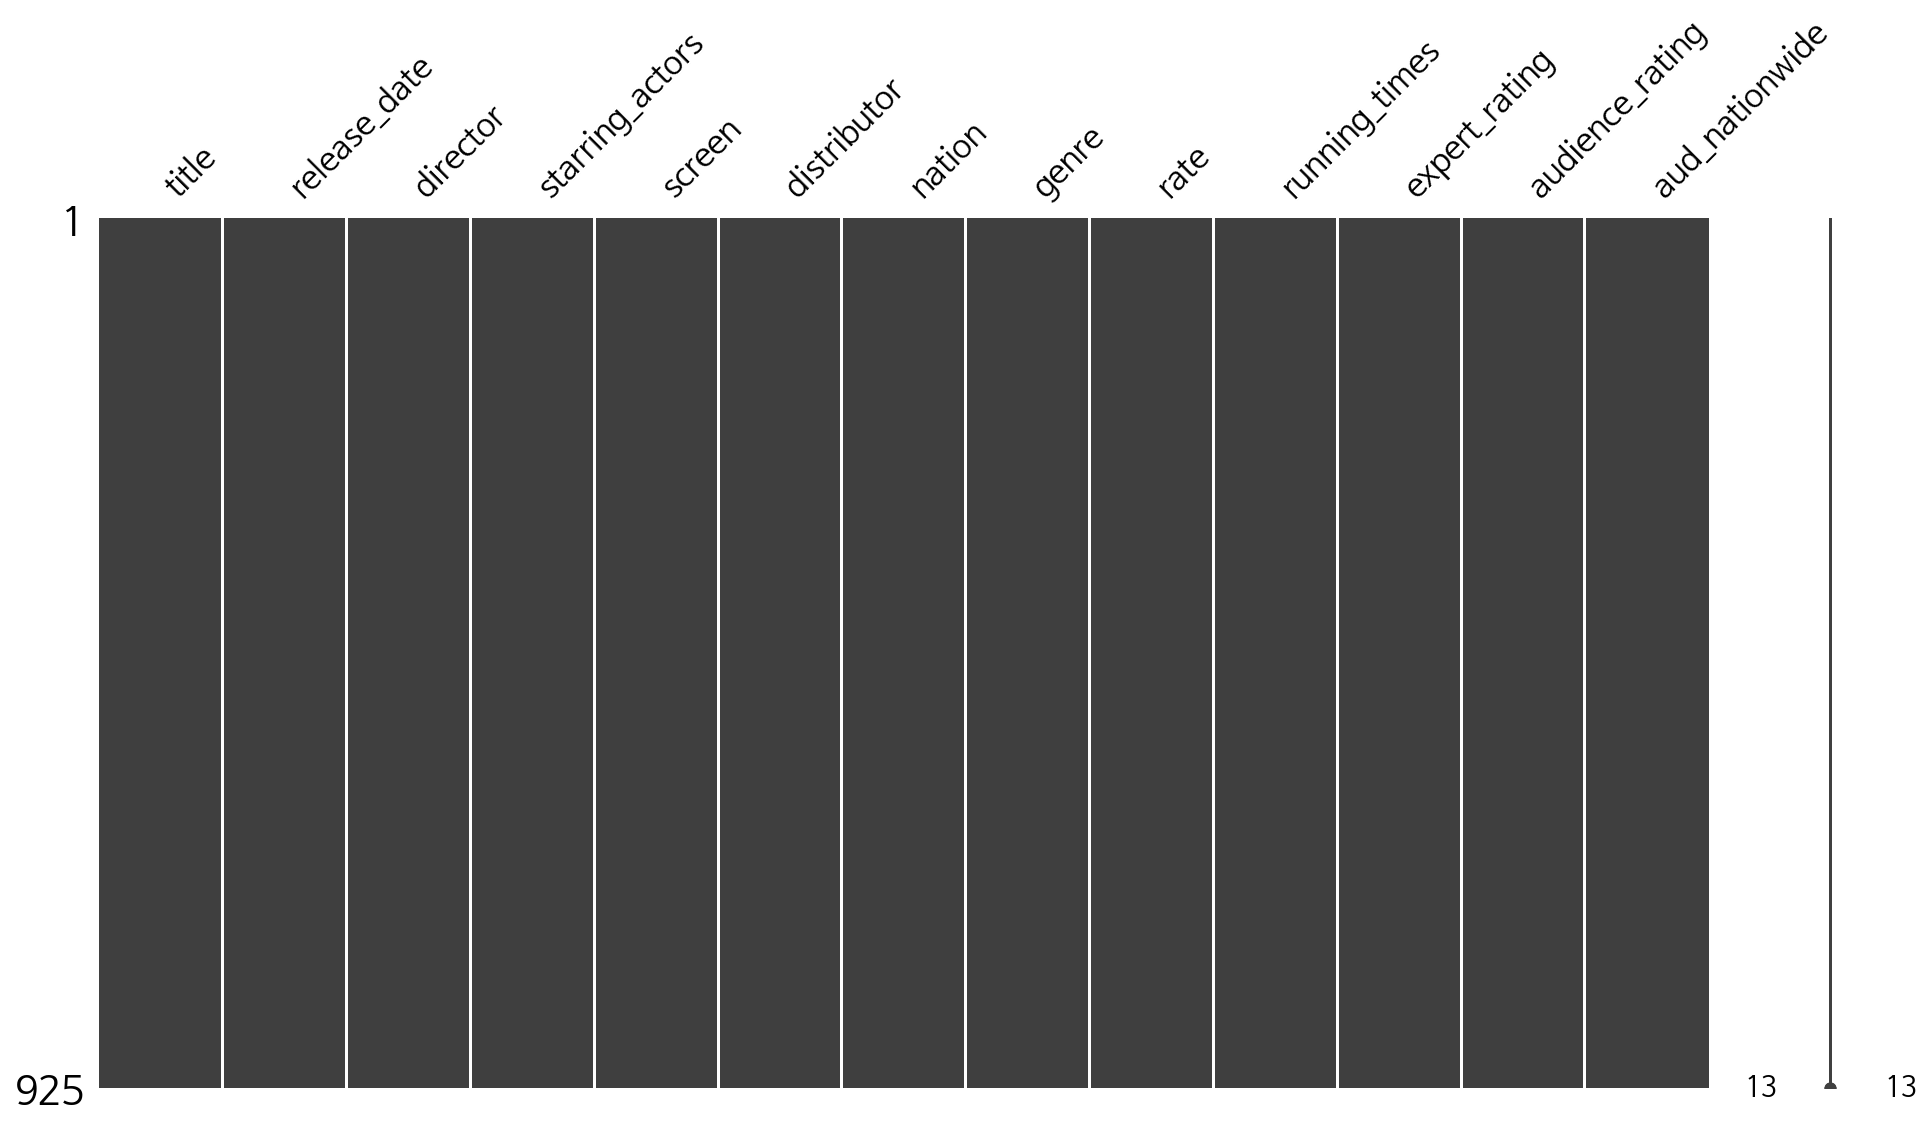

In [26]:
msno.matrix(df_final_14_origin, figsize=(16, 8))
plt.show()

In [1]:
palette = ['#FFFD64', '#F9D537', '#FF9B00', '#FF8200', '#EBBC6B',  '#FF8C00','#8A4C44', '#FFD700', '#F7B938', '#F5F0C5', '#FFFF00', '#F8E77F', '#F1A55A',
           '#E5B98F', '#FFAA28', '#ED9149', '#FFB400', '#C8852C', '#FFD732', '#D6B038', '#9A6B31', '#F6CF7A', '#DDA28F', 
           '#BB9E9B', '#BD7F41', '#C38866', '#D77964', '#CA5E59', '#BE577B', '#BA4C44', 
           '#8E6F80', '#E16350', '#D8C8B2']

In [28]:
!pip install matplotlib=3.1.2

ERROR: Invalid requirement: 'matplotlib=3.1.2'
Hint: = is not a valid operator. Did you mean == ?


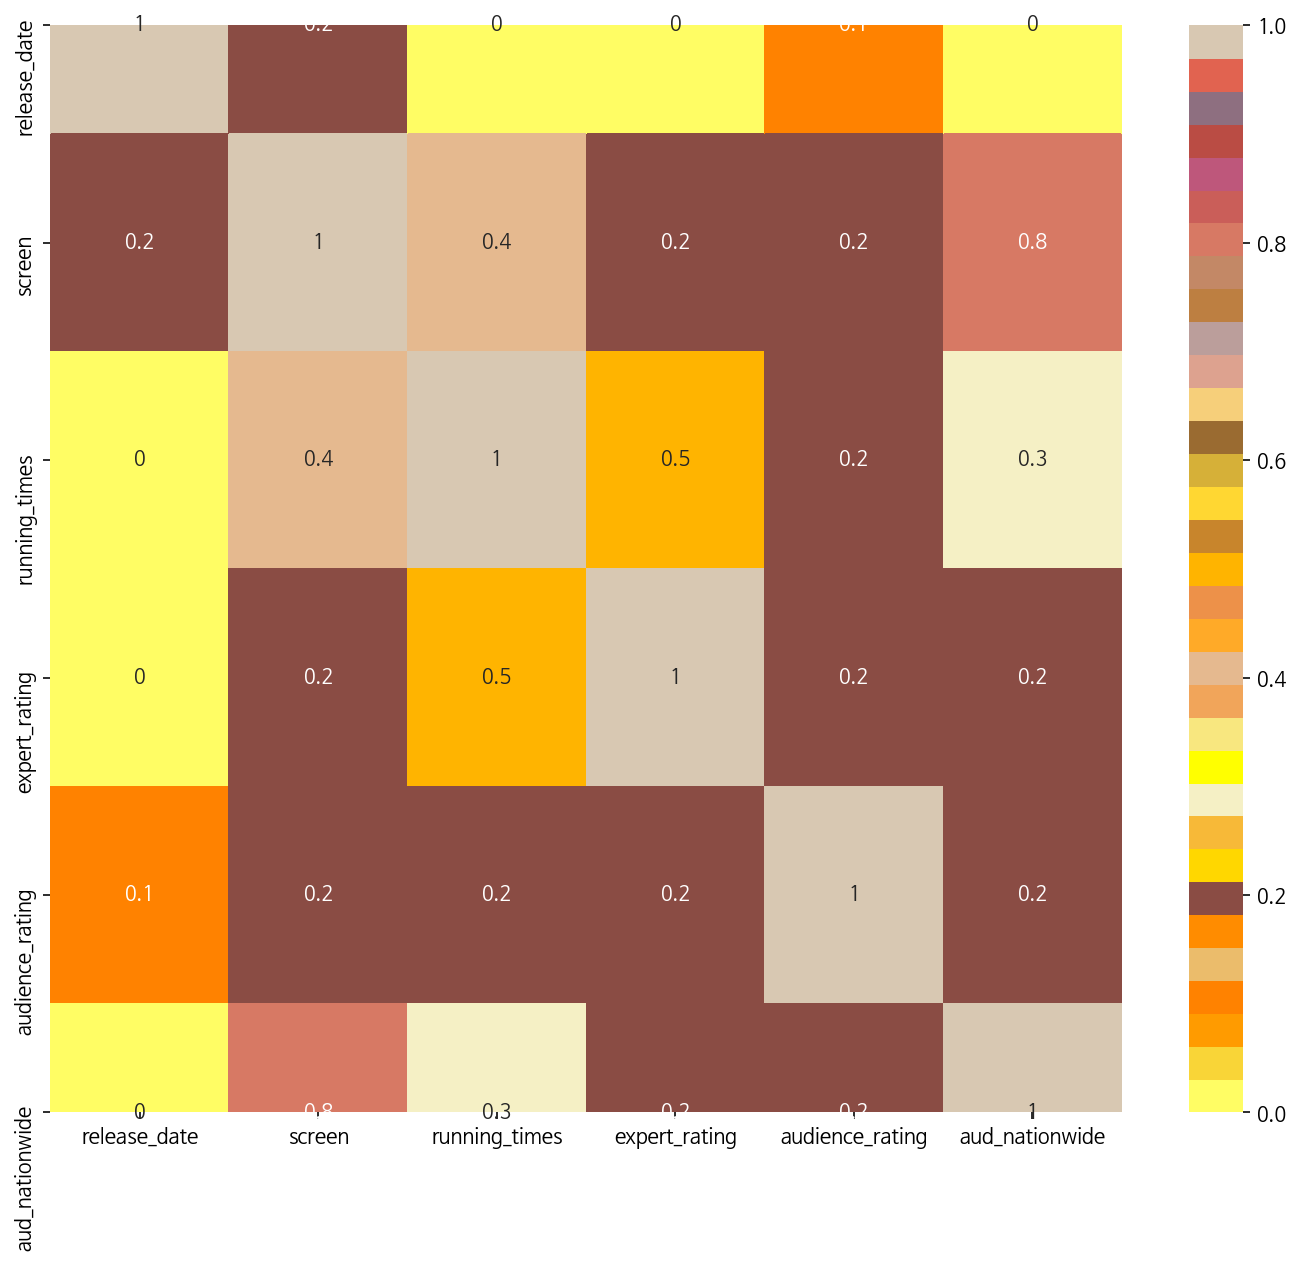

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_final_14_origin.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap=palette)
plt.show()

### category column 정리

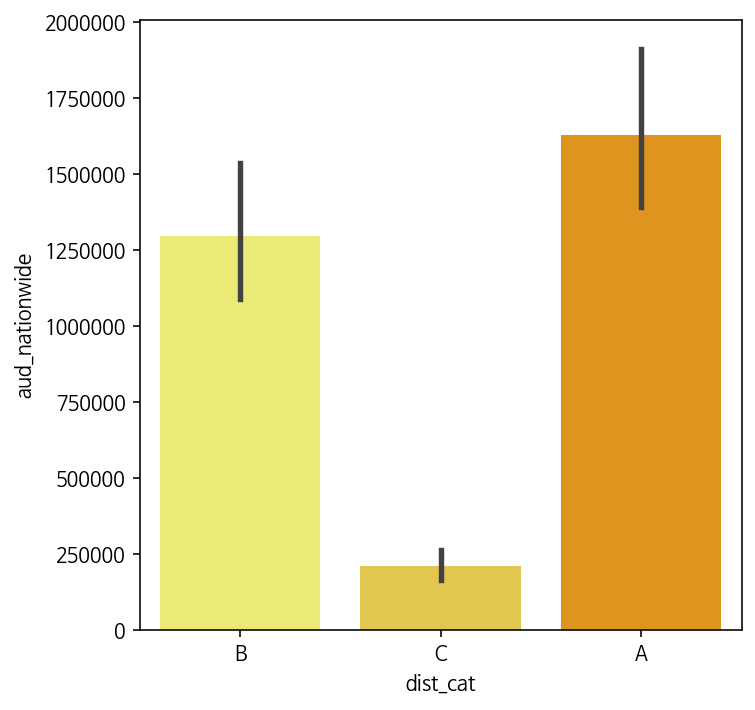

In [345]:
plt.figure(figsize=(14, 5))

plt.subplot(131)
palette = ['#FFFD64', '#F9D537', '#FF9B00', '#FF8200', '#EBBC6B',  '#FF8C00','#8A4C44', '#FFD700', '#F7B938', '#F5F0C5', '#FFFF00', '#F8E77F', '#F1A55A',
           '#E5B98F', '#FFAA28', '#ED9149', '#FFB400', '#C8852C', '#FFD732', '#D6B038', '#9A6B31', '#F6CF7A', '#DDA28F', 
           '#BB9E9B', '#BD7F41', '#C38866', '#D77964', '#CA5E59', '#BE577B', '#BA4C44', 
           '#8E6F80', '#E16350', '#D8C8B2']

sns.barplot(x=df_final_14['dist_cat'], y='aud_nationwide', data=df_final_14, palette=palette)



plt.tight_layout()

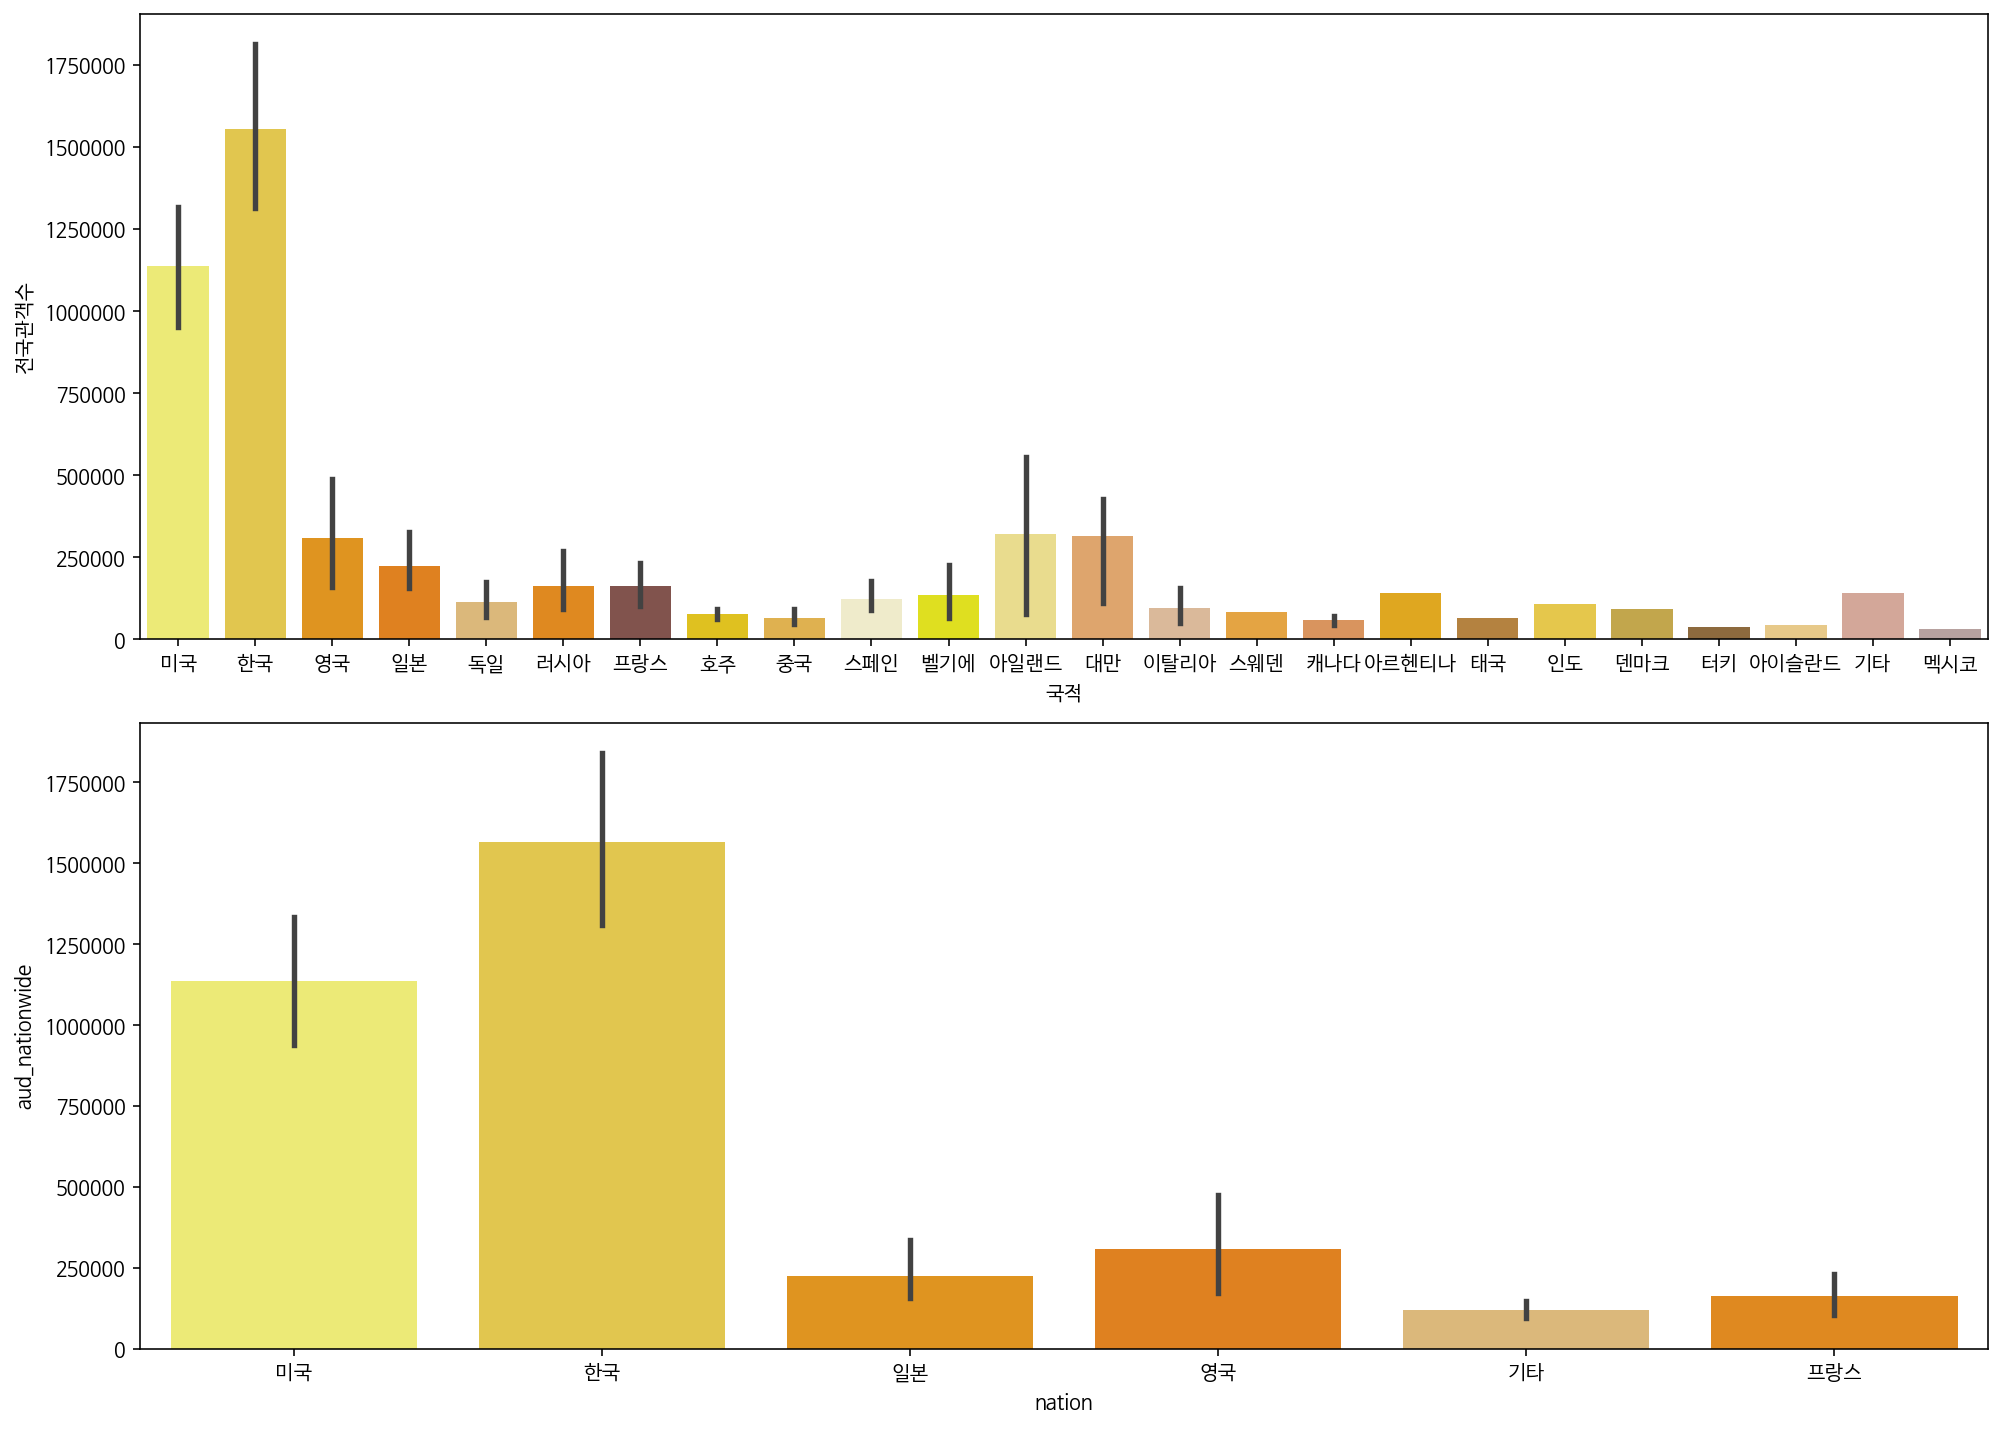

In [343]:
# 국적 정리
df_final_03 = pd.read_csv("../final_df_03_ols.csv")
df_final_03 = df_final_03.drop("Unnamed: 0", axis=1)
palette = ['#FFFD64', '#F9D537', '#FF9B00', '#FF8200', '#EBBC6B',  '#FF8C00','#8A4C44', '#FFD700', '#F7B938', '#F5F0C5', '#FFFF00', '#F8E77F', '#F1A55A',
           '#E5B98F', '#FFAA28', '#ED9149', '#FFB400', '#C8852C', '#FFD732', '#D6B038', '#9A6B31', '#F6CF7A', '#DDA28F', 
           '#BB9E9B', '#BD7F41', '#C38866', '#D77964', '#CA5E59', '#BE577B', '#BA4C44', 
           '#8E6F80', '#E16350', '#D8C8B2']
plt.figure(figsize=(14, 10))


plt.subplot(211)
sns.barplot(x=df_final_03["국적"], y=df_final_03["전국관객수"], palette=palette)

plt.subplot(212)
sns.barplot(x=df_final_14["nation"],
            y=df_final_14["aud_nationwide"],  palette=palette)


plt.tight_layout()
plt.show()

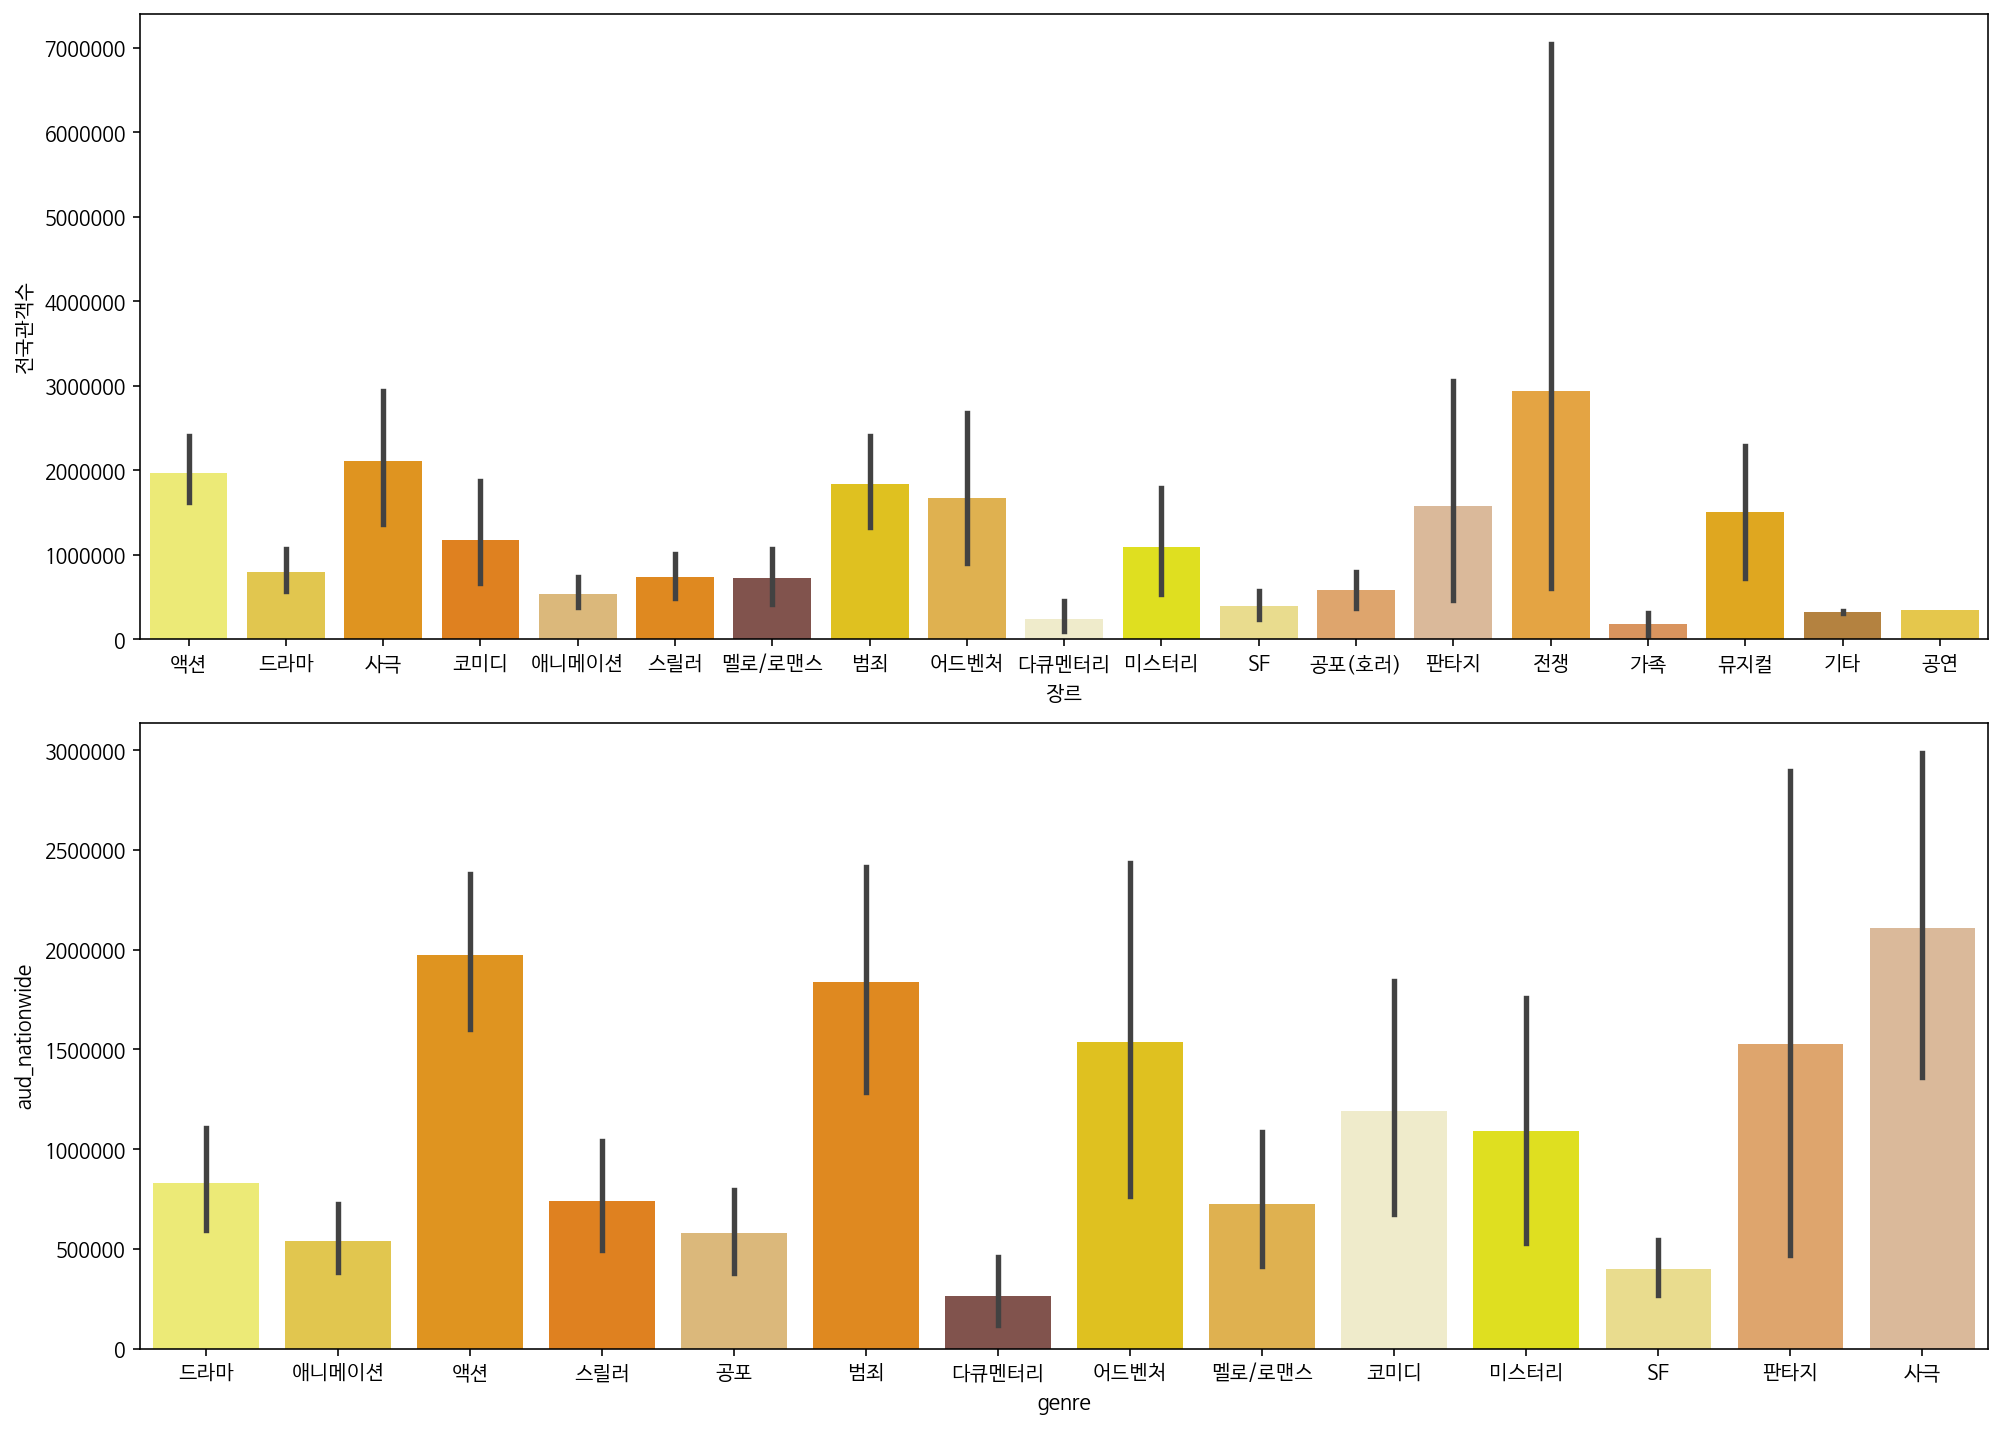

In [344]:
#### 장르 정리
plt.figure(figsize=(14, 10))


palette = ['#FFFD64', '#F9D537', '#FF9B00', '#FF8200', '#EBBC6B',  '#FF8C00','#8A4C44', '#FFD700', '#F7B938', '#F5F0C5', '#FFFF00', '#F8E77F', '#F1A55A',
           '#E5B98F', '#FFAA28', '#ED9149', '#FFB400', '#C8852C', '#FFD732', '#D6B038', '#9A6B31', '#F6CF7A', '#DDA28F', 
           '#BB9E9B', '#BD7F41', '#C38866', '#D77964', '#CA5E59', '#BE577B', '#BA4C44', 
           '#8E6F80', '#E16350', '#D8C8B2']


plt.subplot(211)
sns.barplot(x=df_final_03["장르"], y=df_final_03["전국관객수"], palette=palette)

plt.subplot(212)
sns.barplot(x=df_final_14["genre"], y=df_final_14["aud_nationwide"], palette=palette)

plt.tight_layout()
plt.show()

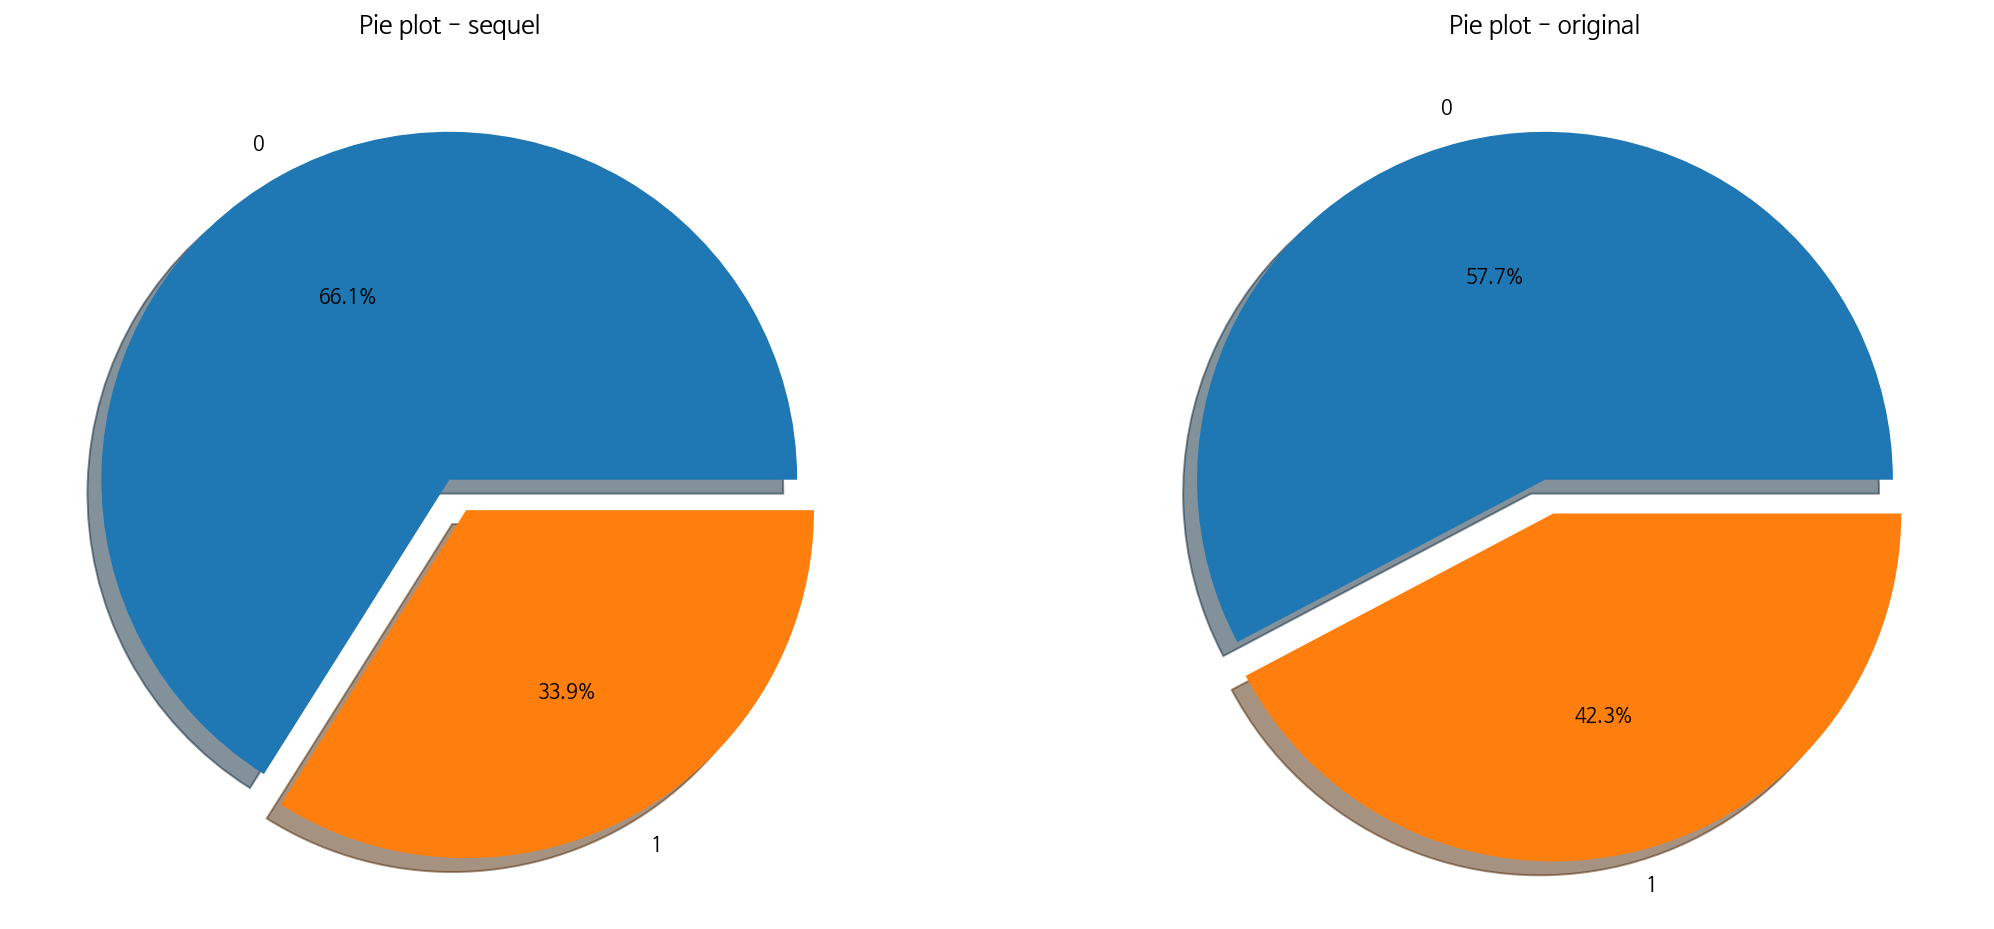

In [299]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_final_14['sequel'].value_counts().plot.pie(explode=[0, 0.1],
                                                  autopct='%1.1f%%', ax=ax[0], shadow=True)
df_final_14['original'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Pie plot - sequel')
ax[0].set_ylabel('')
ax[1].set_title('Pie plot - original')
ax[1].set_ylabel('')

plt.show()

### ols 돌리기

#### 1. 기본모형

In [13]:
df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power', 'sequel',
       'original', 'actor_power', 'director_count', 'director_movie_count',
       'actor_movie_count', 'log_aud', 'before_news', 'after_news', 'holiday',
       'dist_cat', 'aud_nationwide', 'log_aud'],
      dtype='object')

In [15]:
model_basic = sm.OLS.from_formula("aud_nationwide ~ scale(screen) + scale(expert_rating) + scale(audience_rating) + scale(running_times) + rate + nation + dist_cat + genre + C(sequel) + C(original)", data=df)
result_basic = model_basic.fit()
print(result_basic.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     45.41
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          8.65e-141
Time:                        13:45:44   Log-Likelihood:                -11381.
No. Observations:                 740   AIC:                         2.282e+04
Df Residuals:                     710   BIC:                         2.296e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.42

In [16]:
pred_basic = result_basic.predict(X_test[["screen", "expert_rating", "audience_rating",
                                          "running_times", "rate", "nation", "dist_cat",  "genre", "sequel", "original"]])
rss_basic = ((y_test.aud_nationwide - pred_basic) ** 2).sum()
tss_basic = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared_basic = 1 - rss_basic/tss_basic
rsquared_basic

0.6145746694332175

In [37]:
y_hat = pd.DataFrame(pred_basic, columns = ["pred_y"])
y_hat

pred_y
0    2.131288e+06
1    6.886657e+05
2    1.646598e+06
3    2.901004e+05
4    2.381793e+06
..            ...
180 -2.068586e+05
181  1.160598e+06
182  3.067205e+06
183  1.045868e+06
184  5.889803e+06

[185 rows x 1 columns]

In [51]:
df_com_y = pd.concat([y_hat, y_test], axis=1)
df_com_y

pred_y  aud_nationwide    log_aud
0    2.131288e+06         2625686  14.780853
1    6.886657e+05          703024  13.463146
2    1.646598e+06          286806  12.566561
3    2.901004e+05           96305  11.475276
4    2.381793e+06          665364  13.408090
..            ...             ...        ...
180 -2.068586e+05           93534  11.446080
181  1.160598e+06          675966  13.423898
182  3.067205e+06         1820760  14.414765
183  1.045868e+06          118612  11.683613
184  5.889803e+06        10494499  16.166362

[185 rows x 3 columns]

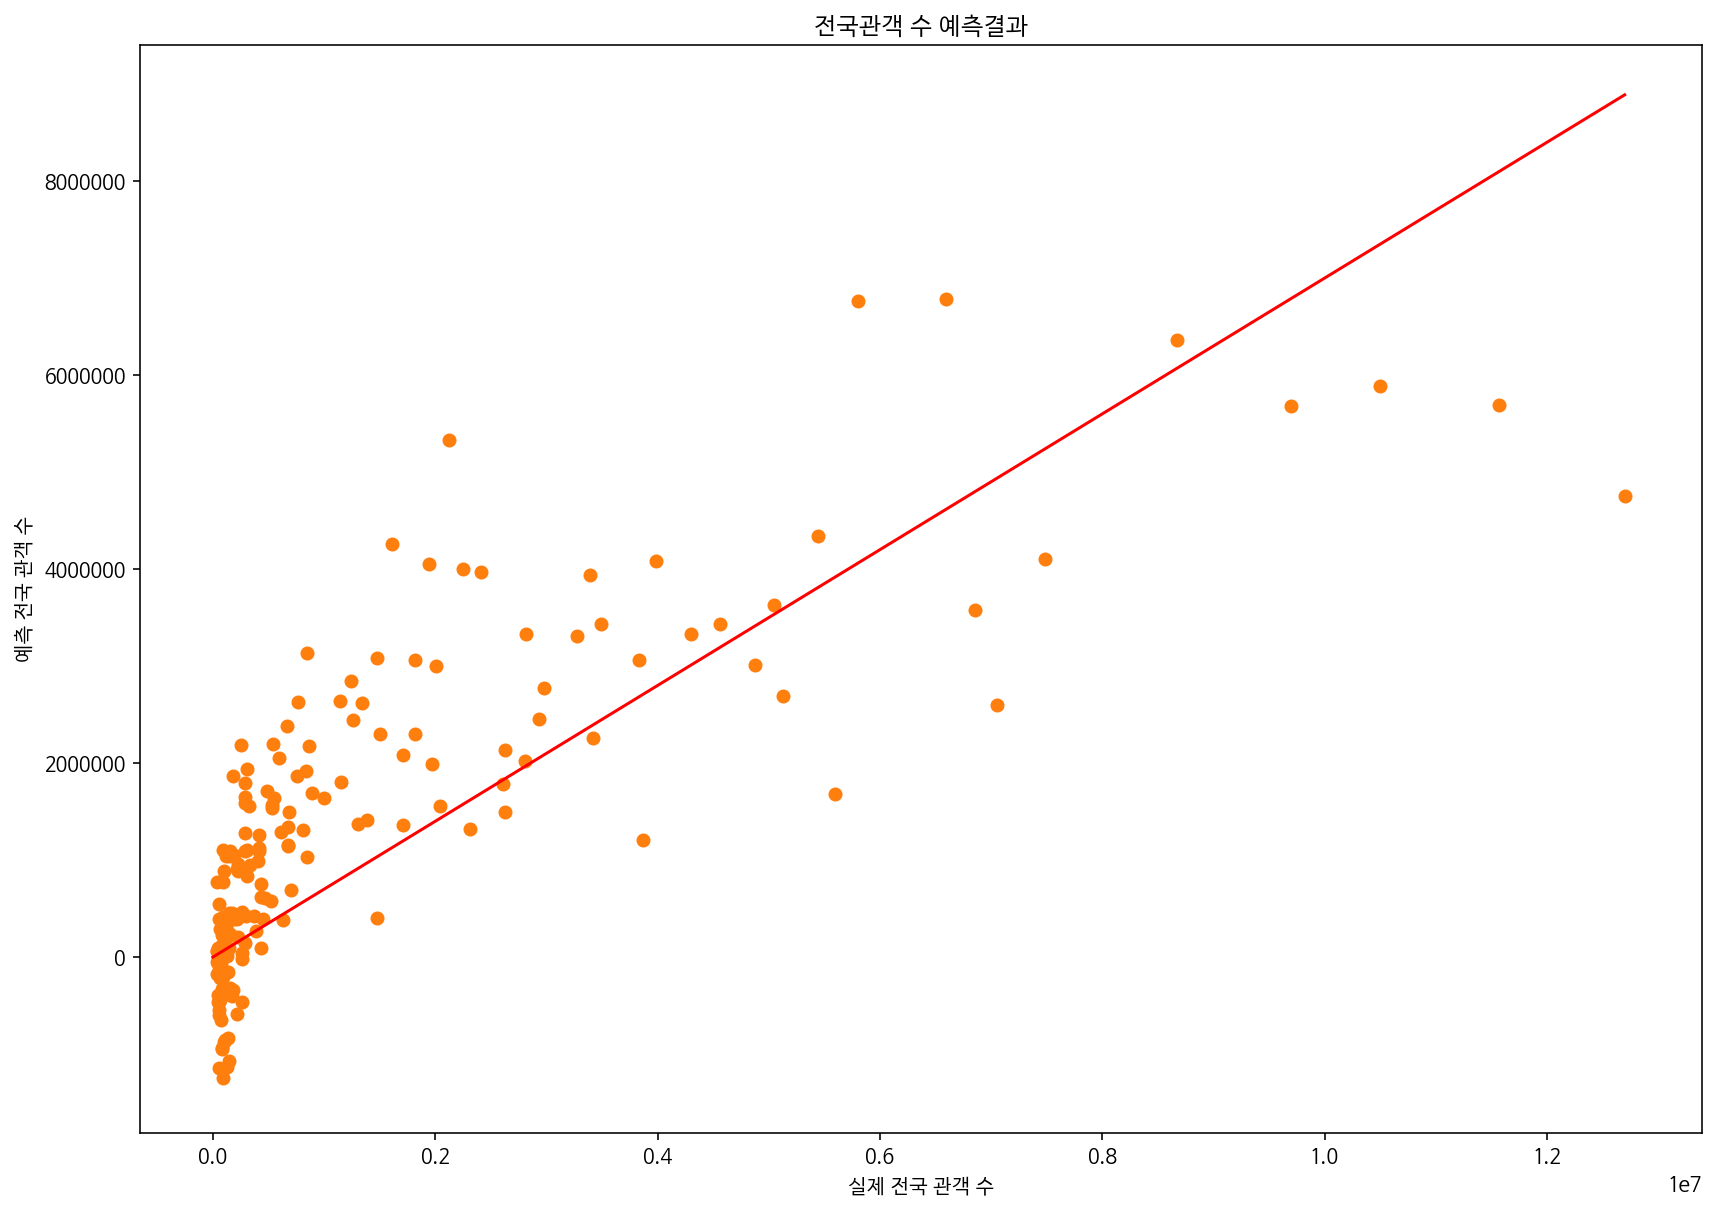

In [129]:
plt.figure(figsize=(14, 10))
w= 0.7
xx = np.linspace(0, 1.27e7, 100)
#xx = np.linspace(10, 20, 1)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(x=df_com_y["aud_nationwide"], y=df_com_y["pred_y"], c='tab:orange')
plt.xlabel("실제 전국 관객 수")
plt.ylabel("예측 전국 관객 수")
plt.title("전국관객 수 예측결과")
plt.show()


### director power, actor power 추가

In [30]:
model_power = sm.OLS.from_formula("aud_nationwide ~ scale(screen) + scale(expert_rating) + scale(audience_rating) + scale(running_times) + rate + nation + dist_cat + genre + C(sequel) + C(original) + scale(director_power) + scale(actor_power)", data=df)
result_power = model_power.fit()
print(result_power.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     44.15
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          3.24e-143
Time:                        17:35:17   Log-Likelihood:                -11371.
No. Observations:                 740   AIC:                         2.281e+04
Df Residuals:                     708   BIC:                         2.295e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.16

In [ ]:
starring_actors_list  = list(final_df["starring_actors"])

In [ ]:

name_list = []

for names in starring_actors_list:
    pre_list = names.split(',')
    for name in pre_list:
        name_list.append(name.split('(')[0].strip())

In [ ]:
duplicated_actors = list([name for name, count in collections.Counter(name_list).items() if count > 1])

In [ ]:
len(duplicated_actors)


In [ ]:
duplicated_actors[10]

In [ ]:
def find_duplicated(duplicated_actors, final_df, col = "starring_actors"):
    ls_m = []
    for actor in duplicated_actors:
        for i in range(len(final_df)):
            if actor in final_df[col][i]:
                ls_m.append({"actor" : actor, "idx" : i, "영화명" : final_df["영화명"][i]})
    return pd.DataFrame(ls_m)


In [ ]:

actor_df = find_duplicated(["로버트 다우니 주니어", "크리스 헴스워스"], final_df)
actor_df